In [4]:
import pandas as pd
import seaborn as sns
import math
from PIL import Image, ImageDraw

df1 = pd.read_csv('../Bildgenerierung/horizontale.csv')
df2 = pd.read_csv('../Bildgenerierung/strichmann.csv')
df3 = pd.read_csv('../Bildgenerierung/ostfalia.csv')
df4 = pd.read_csv('../Bildgenerierung/vertikale.csv')
df5 = pd.read_csv('../Bildgenerierung/tshirt.csv')
df6 = pd.read_csv('../Bildgenerierung/schlange.csv')
df7 = pd.read_csv('../Bildgenerierung/haus_vom_nikolaus.csv')
dfs = [df1, df2, df3, df4, df5, df6, df7]

def distancePointToCircle(P, A, B):
    M = [(B[0] + A[0]) * 0.5, (B[1] + A[1]) * 0.5]
    MP = [M[0] - P[0], M[1] - P[1]]
    length_MP = math.sqrt(MP[0] ** 2 + MP[1] ** 2)

    outer_radius = abs(A[0] - M[0])
    radius = outer_radius - 12.5
    return abs(length_MP - radius)

def distancePointToLineBetweenPoints(P, A, B):
    AB = [B[0] - A[0], B[1] - A[1]]
    AP = [P[0] - A[0], P[1] - A[1]]

    length_AB = math.sqrt(AB[0] ** 2 + AB[1] ** 2)
    AB_unit = [AB[0] / length_AB, AB[1] / length_AB]

    dot_product = AP[0] * AB_unit[0] + AP[1] * AB_unit[1]
    projection = [AB_unit[0] * dot_product, AB_unit[1] * dot_product]

    I = [A[0] + projection[0], A[1] + projection[1]]
    AI = [A[0] - I[0], A[1] - I[1]]
    BI = [B[0] - I[0], B[1] - I[1]]
    length_AI = math.sqrt(AI[0] ** 2 + AI[1] ** 2)
    length_BI = math.sqrt(BI[0] ** 2 + BI[1] ** 2)
    if length_AB < length_AI + length_BI:
        BP = [P[0] - B[0], P[1] - B[1]]
        length_AP = math.sqrt(AP[0] ** 2 + AP[1] ** 2)
        length_BP = math.sqrt(BP[0] ** 2 + BP[1] ** 2)
        #print('aussen ' + str(min(length_AP, length_BP)) + str(P) + str(A) + str(B))
        return min(length_AP, length_BP)
    PI = [P[0] - I[0], P[1] - I[1]]
    return math.sqrt(PI[0] ** 2 + PI[1] ** 2)
    
def calculateDistance(index, x, y):
    df = dfs[index]
    dist = 1000000
    distance = 0
    for index, row in df.iterrows():
        match row['type']:
            case 'l':
                distance = distancePointToLineBetweenPoints((x,y), (row['x1'], row['y1']), (row['x2'], row['y2']))
            case 'c':
                distance = distancePointToCircle((x,y), (row['x1'], row['y1']), (row['x2'], row['y2']))
        if dist > distance:
            dist = distance
    return dist
  
#def a():
#    A = (500, 650)
#    B = (500, 300)
#    P = (560, 299)
#    print(distancePointToLineBetweenPoints(P, A, B))

#a()
point_size = 1
image1 = Image.open('../Bildgenerierung/horizontale.png')
image2 = Image.open('../Bildgenerierung/strichmann.png')
image3 = Image.open('../Bildgenerierung/ostfalia.png')
image4 = Image.open('../Bildgenerierung/vertikale.png')
image5 = Image.open('../Bildgenerierung/tshirt.png')
image6 = Image.open('../Bildgenerierung/schlange.png')
image7 = Image.open('../Bildgenerierung/haus_vom_nikolaus.png')

images = [image1, image2, image3, image4, image5, image6, image7]

allDistances = []

draw = []
for image in images:
    draw.append(ImageDraw.Draw(image))

for n in range(1, 27):
    print('person nr. ' + str(n))
    df = pd.read_csv('../Versuchsdaten_vorverarbeitet/' + str(n) + '/real.csv')
    pictures = df.groupby('sublevel')
    imageIndex = 0

    for group_value, group_data in pictures:
        pic_dataframes = []
        pic_dataframes.append(group_data.copy())
        pic_df = pd.concat(pic_dataframes, ignore_index=True)

        for index, row in pic_df.iterrows():
            x = float(row['x'])
            y = float(row['y'])
            #draw[imageIndex].point((x, y), fill=(100, 100, 100))
            distance = calculateDistance(imageIndex, x, y)
            allDistances.append(distance)
            red = int(distance * 10 - 45)
            green = int(255 - distance * 10)
            blue = 0
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            draw[imageIndex].rectangle([x - point_size, y - point_size, x + point_size, y + point_size], fill=(red,green,blue))
        imageIndex += 1
imageIndex = 0
for image in images:
    image.save('../Visualisierungen/Real/image' + str(imageIndex) + '.png')
    imageIndex += 1
print('Done')

person nr. 1
person nr. 2
person nr. 3
person nr. 4
person nr. 5
person nr. 6
person nr. 7
person nr. 8
person nr. 9
person nr. 10
person nr. 11
person nr. 12
person nr. 13
person nr. 14
person nr. 15
person nr. 16
person nr. 17
person nr. 18
person nr. 19
person nr. 20
person nr. 21
person nr. 22
person nr. 23
person nr. 24
person nr. 25
person nr. 26
Done


In [25]:
from PIL import Image, ImageOps

def crop_image(image):    
    width, height = image.size
    left = 0
    upper = 0
    right = width
    lower = height

    while all(image.getpixel((x, upper)) == (255,255,255) for x in range(width)):
        upper += 1
    
    while all(image.getpixel((x, lower - 1)) == (255,255,255) for x in range(width)):
        lower -= 1
    
    while all(image.getpixel((left, y)) == (255,255,255) for y in range(height)):
        left += 1
    
    while all(image.getpixel((right - 1, y)) == (255,255,255) for y in range(height)):
        right -= 1

    return image.crop((left, upper, right, lower))

new_image = Image.new('RGB',(2*1368, 3*912), (0,0,0))
new_image.paste(images[0],(0,0))
new_image.paste(images[1],(1368,0))
new_image.paste(images[2],(0,912))
new_image.paste(images[3],(1368,912))
new_image.paste(images[4],(0,1824))
new_image.paste(images[5],(1368,1824))

new_image.save("../Visualisierungen/Real/image-merged-real.png")

cropp = crop_image(new_image)
cropp.save("../Visualisierungen/Real/cropped-image-merged-real.png")
print('Done2')

Done2


Amount of Pixels: 58113
Amount of Pixels filtered: 58113


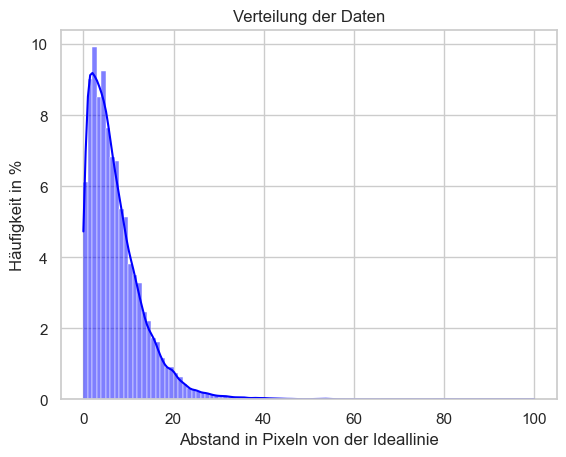

In [31]:
import matplotlib.pyplot as plt
print('Amount of Pixels: ' + str(len(allDistances)))
#filtered_list = allDistances
filtered_list = [x if x <= 100 else 100 for x in allDistances]

print('Amount of Pixels filtered: ' + str(len(filtered_list)))
sns.set(style="whitegrid")
sns.histplot(filtered_list, kde=True, color='blue', binwidth=1, stat='percent')
plt.title("Verteilung der Daten")
plt.xlabel("Abstand in Pixeln von der Ideallinie")
plt.ylabel("Häufigkeit in %")

plt.savefig('../Visualisierungen/Real/distribution-pixeldistance.png', dpi=300)
plt.show()
plt.close()